# **Airbnb Data Analysis - London**

This notebook has the data analysis of the Airbnb's dataset for the city of London, UK.

[Airbnb](https://www.airbnb.co.uk/) is one of the largest companies for renting accomodations and share experiences in the world. It offers over 7 million places to stay. The platform connects the hosts and travellers through a solid service based on reviews, verified profiles, trusted service and customer support.

[Inside Airbnb](http://insideairbnb.com/get-the-data.html) is a initiative to provide hosting data from many cities around the globe. The site's database is a nice source for data science projects.

##**Data Acquisition**

In [ ]:
#import libraries

import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
#import dataset as a dataframe

df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

##**EDA**

###**Understanding the variables**

It is a good practice to understand the variables of the dataset, which is the type of each variable, the size of the dataframe and how it is organized.

### Show DataFrame


In [ ]:
#show the dataframe heading

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### Number of inputs and variables

In [ ]:
#number of variables and amount of entries

print(f'Inputs: {df.shape[0]}')
print(f'Variables {df.shape[1]}')

Inputs: 85207
Variables 16


###Variables dicitonary

* id - number to identify the property
* name - property name
* host_id - host identification number
* host_name - host name
* neighbourhood_group - no valid values
* neighbourhood - neighbourhood name
* latitude - property's latitude coordinate
* longitude - property's longitude coordinate
* room_type - which type of room of the listing
* price - price per night
* minimum_nights - minimum stay required by the host
* number_of_reviews - number of reviews recieved by the property
* last_review - date of the last review
* reviews_per_month - amount of reviews per month
* calculated_host_listings_count - number of properties of the same host
* availability_365 - available days for 365 days 

### Types of data

In [ ]:
#show the varialbes' types in the dataframe

display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

It is possible to notice that "last_review" variable is not set as  date. It is necessary to fix it before proceed with the analysis.


In [ ]:
# fix last_review variable and show variables' types again

df['last_review'] = pd.to_datetime(df['last_review'])
display(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### Verifying the presence of empty values for each column

It is import to check if there are inputs with invalid or empty values. The proportion of empty (NaN) values of each column is listed below.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.251599
last_review                       0.251599
host_name                         0.000329
name                              0.000282
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

The variable "neighbourhood_group" has only null values, "reviews_per_month" and "last_review" have around 25% on empty values. "host_name" and "name" have less than 1% of null values.

It is safe to remove the "neighbourhood_group" column.


In [ ]:
# drop the null 'neighbourhood_group' column

df = df.drop(columns=['neighbourhood_group'])

In [ ]:
#show new dataframe

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaT,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


As Airbnb is based on trust and verified profiles, null values of "name" and "host_name" are going to be removed.

In [ ]:
#remove entries with NaN values of 'name' and 'host_name' columns

df = df.dropna(axis=0, subset=['name'])
df = df.dropna(axis=0, subset=['host_name'])

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaT,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### Variables distribution

It is possible to plot the histograms of the numeric variables to identify distortions, tendencies or outliers.

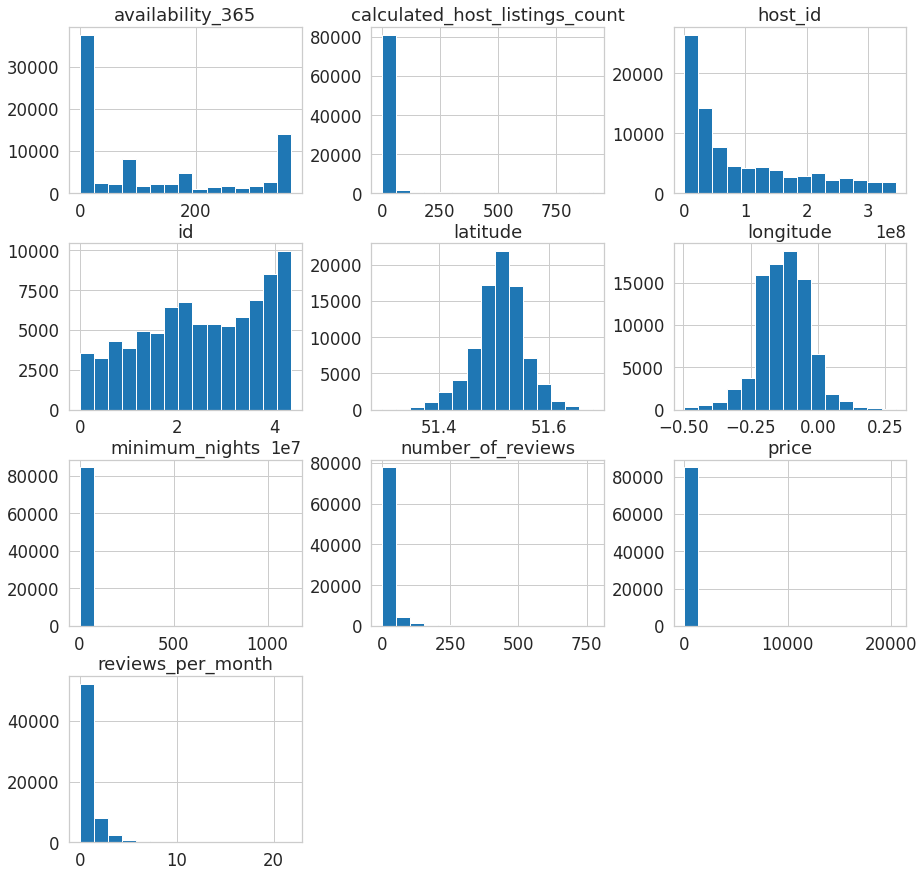

In [ ]:
#plot histograms of the numeric variables

df.hist(bins=15, figsize=(15,15));

It can be identified that the variables "price" and "minimum_nights" have outliers and distort the plots. There are two simple ways to verify the presence of outliers:

* statistical summary with the method `describe()`;
* boxplot plots.

#### `describe()` method

In [ ]:
#statistical summary for the numerical variables

df[['price', 'minimum_nights', 'availability_365', 
    'calculated_host_listings_count', 'number_of_reviews', 
    'reviews_per_month']].describe()
  

,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month
count,85155.000000,85155.000000,85155.000000,85155.000000,85155.000000,63747.000000
mean,128.930515,4.594046,122.499348,20.234408,17.286020,0.877037
std,306.974152,19.671382,139.302487,98.099599,37.165027,1.090697
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.010000
25%,46.000000,1.000000,0.000000,1.000000,0.000000,0.180000
50%,81.000000,2.000000,74.000000,1.000000,4.000000,0.500000
75%,140.000000,3.000000,251.000000,5.000000,17.000000,1.150000
max,20471.000000,1125.000000,365.000000,910.000000,775.000000,21.810000


Some hypotesis can be verified by analysing the statistical results above:

* Most of the the listing (75%) have prices up to £140.00, although the maximum value of £20471.00 is way above the others prices;
* The maximum value for minimum stay is 1125 days, more than the 365 days of a year. 

As this analysis will focus on listings for a maximum of one month of stay, the maximum value for the variable "minimum_nights" will be set as 30 days.


#### Boxplot analysis


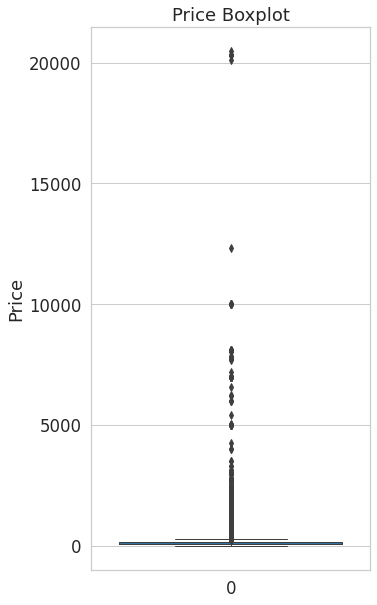


price: Values above £750
1190 entries
1.3975%


In [ ]:
#plot the boxplot for the price variable

fig, ax = plt.subplots(figsize=(5,10))
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(data=df['price']).set(ylabel='Price')
plt.title('Price Boxplot')
plt.show()

#check the number of entries above £750
print("\nprice: Values above £750")
print(f"{len(df[df.price > 750])} entries")
print("{:.4f}%".format((len(df[df.price > 750]) / df.shape[0])*100))

Only 1.40% of the listings have values above £750.00 per night of stay. These values are enough to distort the plots.

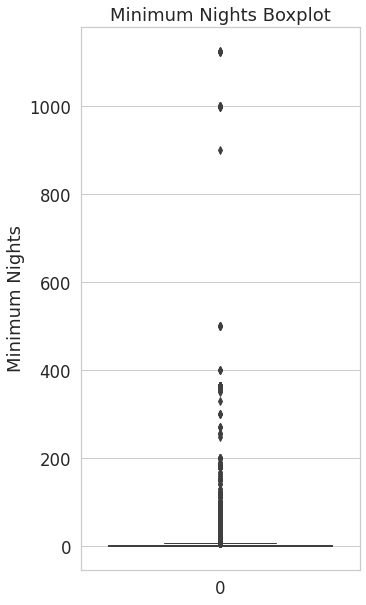


minimum_nights: Values above 30 days
1038 entries
1.2190%


In [ ]:
#plot the boxplot for the minimum_nights variable

fig, ax = plt.subplots(figsize=(5,10))
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(data=df['minimum_nights']).set(ylabel='Minimum Nights')
plt.title('Minimum Nights Boxplot')
plt.show()

#check the number of entries above 30 days
print("\nminimum_nights: Values above 30 days")
print(f"{len(df[df.minimum_nights > 30])} entries")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

1.22% of the listings demand the guest to stay longer than 30 days.

#### Histograms without outliers

As the outliers for the variables 'price' and 'minimum_nights' were identified, it is possible to plot the histograms with less distortion.

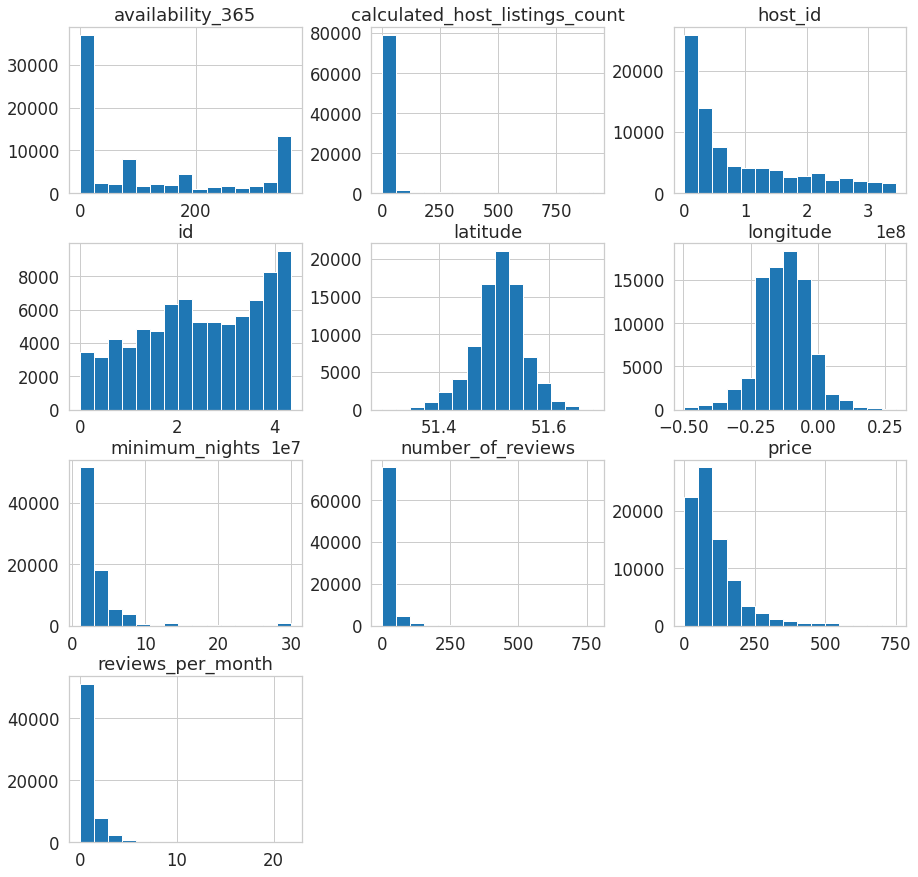

In [ ]:
#remove outliers on dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 750].index, axis=0, inplace=True);
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True);

#plot adjusted histograms 
df_clean.hist(bins=15, figsize=(15,15));

From the histograms, most listings have prices up to £150.00 and most the minimum stays required are around 3 nights. 

##**Analysis**

###**Correlation**

The next step of the analysis is to check if there are any correlation among the variables. A heatmap can easily show any relation.

In [ ]:
#create a correlation matrix
cor_mat = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'calculated_host_listings_count',
                        'availability_365']].corr()
display(cor_mat)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.041109,-0.096921,-0.083546,0.369264,0.129209
minimum_nights,0.041109,1.000000,-0.087699,-0.144194,0.020278,0.020002
number_of_reviews,-0.096921,-0.087699,1.000000,0.722093,-0.057304,0.115756
reviews_per_month,-0.083546,-0.144194,0.722093,1.000000,-0.050322,0.131824
calculated_host_listings_count,0.369264,0.020278,-0.057304,-0.050322,1.000000,0.006468
availability_365,0.129209,0.020002,0.115756,0.131824,0.006468,1.000000


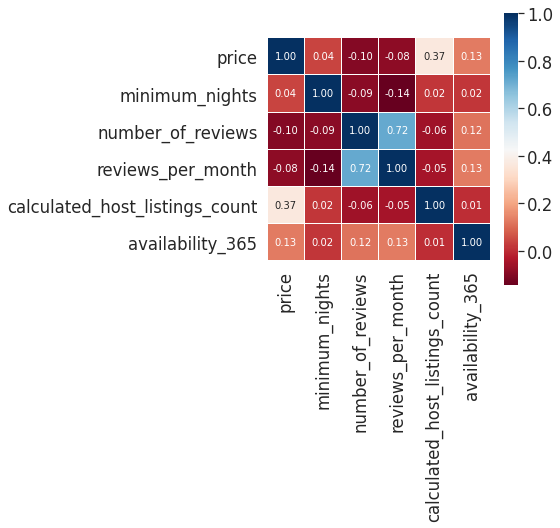

In [ ]:
#plot a heatmap from the correlation matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data=cor_mat, cmap='RdBu', fmt='.2f', square=True, 
            linewidths=0.1, linecolor='white', annot=True, annot_kws={"size":10});

There is almost no correlation among the variables, except number_of_reviews and reviews_per_month.

###**Property Types**

It is interesting to understand the most rented kind of property. The listings can be defined as Entire Place, Private Room, Hotel Room and Shared Room

In [ ]:
#amount of each kind of property

df_clean.room_type.value_counts()

Entire home/apt    46272
Private room       35373
Hotel room           682
Shared room          623
Name: room_type, dtype: int64

In [ ]:
#proportion of each property kind

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.557830
Private room       0.426438
Hotel room         0.008222
Shared room        0.007511
Name: room_type, dtype: float64

Most listed properties are Entire home/apt and Private room, respectively, 55.8% and 42.6%. Less than 2% of the listings are hotel or shared rooms.

###**Mean Prices**

It is possible to understand the mean price to rend a property in London and the mean price for each neighbourhood.

In [ ]:
#Mean price - London

print('£{:.2f}'.format(df_clean.price.mean()))

£109.48


In [ ]:
#Mean price - Neighbourhoods

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Kensington and Chelsea    176.095172
Westminster               169.634274
City of London            168.687104
Camden                    132.056321
Hammersmith and Fulham    120.161290
Richmond upon Thames      118.692893
Wandsworth                114.477569
Islington                 108.799589
Merton                    102.839758
Southwark                  99.336274
Lambeth                    95.196364
Hounslow                   94.440376
Tower Hamlets              89.719338
Brent                      89.514879
Hackney                    89.387251
Greenwich                  86.753505
Newham                     80.733899
Barnet                     80.322188
Ealing                     79.769585
Haringey                   78.999084
Kingston upon Thames       77.754098
Havering                   70.289575
Enfield                    66.876245
Waltham Forest             66.772947
Harrow                     65.812775
Lewisham                   65.803122
Hillingdon              

The mean price to stay in London is £109.48 per night. Seven neighbourhoods and areas have mean prices above city mean (Kensington and Chelsea, Westminster, City of London, Camden, Hammersmith and Fulham, Richmond upon Thames and Wandsworth).

###**Number of listings per neighbourhood**

In [ ]:
#number of listings by each neighbourhood

numb_neig = df_clean.pivot_table(index=['neighbourhood'], aggfunc='size')
numb_neig = numb_neig.sort_values(ascending=False)
print(numb_neig)

neighbourhood
Westminster               9179
Tower Hamlets             7917
Hackney                   6071
Camden                    5877
Kensington and Chelsea    5737
Islington                 4865
Southwark                 4761
Lambeth                   4731
Wandsworth                4146
Hammersmith and Fulham    3999
Brent                     2554
Lewisham                  2306
Haringey                  2183
Newham                    2003
Ealing                    1736
Greenwich                 1712
Barnet                    1645
Waltham Forest            1449
Merton                    1323
Richmond upon Thames      1182
Croydon                   1081
Hounslow                  1065
Redbridge                  739
Enfield                    703
Hillingdon                 643
Bromley                    639
Kingston upon Thames       549
City of London             473
Harrow                     454
Barking and Dagenham       391
Sutton                     313
Bexley                   

The neighbourhoods with more places to stay are Westminster, Tower Hamlets, Hackney, Camden, and Kensington and Chelsea.

###**Properties locations**

It is convenient to check the locations of the listing on the city map by price.

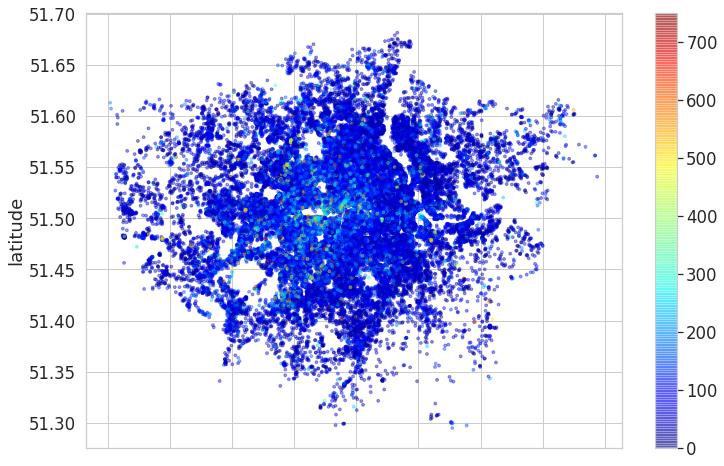

In [ ]:
#plot listings by longitude and latitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), 
              figsize=(12,8));

As expected, most of the properties are close to the river Thames and the main underground lines. The more expensive listings are near the touristic attractions such as Big Ben, London Eye, London Tower and Camden Market.
The images below show London's map and the map of the listings around the city.

London Map

![London Map](https://drive.google.com/uc?id=13PGukra3OYZK6xInVFBLOKCXCZs_xl1s)





Listings on London Map

![Listings on London Map](https://drive.google.com/uc?id=1WMsPIRIqoSAldhPriFchWFgBIewUfsz3)

##**Conclusions**

[Inside Airbnb](http://insideairbnb.com/get-the-data.html) datasets are a great opportunity to learn and develop data analysis and programming skills.

It was possible to notice the presence of outliers in the dataset. Remove the null values which could influence the analysis. It was found the number of properties for each kind, mean price to stay in London and in each neighbourhood, minimum nights to stay, and location and concentration of the listings around the city.

This analysis is a initial step for more complex analysis that can be carried with the datasets avaible on Inside Airbnb website.